In [105]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [106]:
# abvi
abvi = pd.read_csv('Arab_Barometer_Wave_6_Part_1_ENG_RELEASE.csv')
abvi_final = abvi[['Q601_4','COUNTRY']]
abvi_final = abvi_final.rename({'Q601_4':'data', 'COUNTRY':'country'},axis='columns')
# abvi_final = abvi_final.drop(abvi_final[abvi_final.data >5].index)
abvi_final['Period'] = '2020-2021'


# abv
abv = pd.read_csv('ABV_Release_Data.csv')
abv_final = abv[['Q601_4','country']]
abv_final = abv_final.rename({'Q601_4':'data'},axis='columns')
# abv_final = abv_final.drop(abv_final[abv_final.data >5].index)
abv_final['Period']='2018-2019'


# abiv
abiv = pd.read_csv("ABIV_English.csv")
abiv_final = abiv[['q6014','country']]
abiv_final = abiv_final.rename({'q6014':'data'},axis='columns')

abiv_final.loc[abiv_final['data'].str.contains('strongly agree'),'data']=1
abiv_final['data']=abiv_final.data.replace(r'I agree','2')
abiv_final['data']=abiv_final.data.replace(r'I disagree','3')
abiv_final['data']=abiv_final.data.replace(r'I strongly disagree','4')
abiv_final['Period'] = '2016-2017'


# abiii
abiii = pd.read_csv('ABIII_English.csv')
abiii_final = abiii[['q6014','country']]
abiii_final = abiii_final.rename({'q6014':'data'},axis='columns')

abiii_final['data']=abiii_final.data.replace(r'I strongly agree','1')
abiii_final['data']=abiii_final.data.replace(r'I somewhat agree','2')
abiii_final['data']=abiii_final.data.replace(r'I somewhat disagree','3')
abiii_final['data']=abiii_final.data.replace(r'I strongly disagree','4')
abiii_final['Period'] = '2012-2014'



# abii
abii = pd.read_csv('ABII_English.csv')
abii_final = abii[['q60104','country']]
abii_final = abii_final.rename({'q60104':'data'},axis='columns')


abii_final['data']=abii_final.data.replace(r'1. i strongly agree','1')
abii_final['data']=abii_final.data.replace(r'2. i agree','2')
abii_final['data']=abii_final.data.replace(r'3. i disagree','3')
abii_final['data']=abii_final.data.replace(r'4. i strongly disagree','4')
abii_final['country'] = abii_final['country'].apply(lambda x: x.split('. ')[1])

abii_final['Period'] = '2010-2011'



# abi
abi = pd.read_csv('ABI_English.csv')
abi_final = abi[['q5054','country']]
abi_final = abi_final.rename({'q5054':'data'},axis='columns')


abi_final['data']=abi_final.data.replace(r'agree','2')
abi_final['data']=abi_final.data.replace(r'strongly agree','1')
abi_final['data']=abi_final.data.replace(r'disagree','3')
abi_final['data']=abi_final.data.replace(r'strongly disagree','4')
abi_final['Period'] = '2006-2007'

final_df1 = pd.concat([abi_final,abii_final, abiii_final, abiv_final, abv_final, abvi_final])


/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_20521/366357008.py:18: DtypeWarning: Columns (2,6,39,41,44,45,46,47,97,99,101,103,169,172,179,197,198,199,200,213,223,229,231,232,235,237,238,241,245,249,252,260,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,287,289) have mixed types. Specify dtype option on import or set low_memory=False.
  abiv = pd.read_csv("ABIV_English.csv")
/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_20521/366357008.py:30: DtypeWarning: Columns (7,10,31,32,33,34,35,36,43,44,49,50,51,52,70,71,96,99,188,189,190,191,192,193,194,195,196,203,204,205,206,207,208,209,210,211,230,231,240,241,242,243,244,245,246,247,248,265,266,268,269,270,283,291,292,293,294,295) have mixed types. Specify dtype option on import or set low_memory=False.
  abiii = pd.read_csv('ABIII_English.csv')
/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_20521/366357008.py:43: DtypeWarning: Columns (2,3,6,13,18,23,24,25,26,27,28,

In [107]:
final_df = final_df1.copy()


cleaning up the missing responses

In [108]:
final_df['Period'].value_counts()

2018-2019    26780
2012-2014    14809
2010-2011    12782
2016-2017     9000
2006-2007     7337
2020-2021     5729
Name: Period, dtype: int64

In [109]:
# fill NA to  a string to show the distribution
final_df['data'] = final_df['data'].fillna('NA')
final_df['data'].value_counts().sum()

76437

In [110]:
# getting rid of the string
final_df['data'] = pd.to_numeric(final_df['data'], errors='coerce')

# filtering data above 5, i.e no response, recasting to int, and distribution
final_df = final_df[final_df['data'] < 5]
final_df['data'] = final_df['data'].astype(int)
final_df['data'].value_counts()

4    31276
3    28125
2    10273
1     5773
Name: data, dtype: int64

In [111]:
mean_by_period = pd.DataFrame(final_df.groupby('Period')['data'].mean())
mean_by_period.round(2)

,data
Period,
2006-2007,2.99
2010-2011,2.98
2012-2014,3.09
2016-2017,3.28
2018-2019,3.15
2020-2021,3.33


In [112]:
pct_change_by_period = mean_by_period.pct_change()
pct_change_by_period= pd.DataFrame((pct_change_by_period['data']*100).round(2))
pct_change_by_period = pct_change_by_period.rename(columns={'data':'PoP Percentage Change'})
pct_change_by_period


,PoP Percentage Change
Period,
2006-2007,NaN
2010-2011,-0.37
2012-2014,3.79
2016-2017,6.02
2018-2019,-3.89
2020-2021,5.72


In [113]:
pct_change_by_period['PoP Percentage Change'].sum()/5

2.254

In [114]:
# choose a base period
base_period = '2006-2007'

# extract the data value for the base period
base_period_data = mean_by_period.loc[base_period, 'data']

# calculate the percentage change of data for each subsequent period relative to the base period data value
mean_by_period['Percentage Change from 2006-7 Period'] = ((mean_by_period['data'] / base_period_data - 1) * 100).round(2)
mean_by_period = mean_by_period.round(2)
mean_by_period = mean_by_period.rename(columns={'data':'Average Response Score'})


In [115]:
pd.concat([mean_by_period, pct_change_by_period],axis=1)

,Average Response Score,Percentage Change from 2006-7 Period,PoP Percentage Change
Period,,,
2006-2007,2.99,0.00,NaN
2010-2011,2.98,-0.37,-0.37
2012-2014,3.09,3.40,3.79
2016-2017,3.28,9.63,6.02
2018-2019,3.15,5.37,-3.89
2020-2021,3.33,11.39,5.72


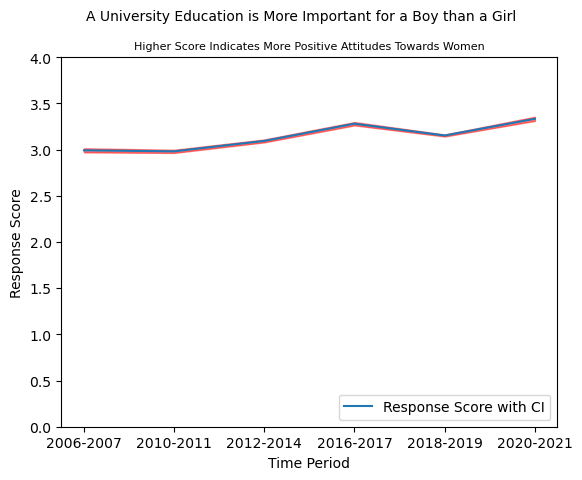

In [118]:
# Compute the mean and standard deviation for each time period
means = final_df.groupby('Period')['data'].mean()
stds = final_df.groupby('Period')['data'].std()

# Compute the standard error of the mean and confidence interval for each time period
n = final_df.groupby('Period')['data'].count()
se = stds / np.sqrt(n)
# Calculate the t-value for a 95% confidence interval with n-1 degrees of freedom
t_value = stats.t.ppf(0.975, n-1)

# Calculate the confidence interval for each time period
ci = t_value * se

# Plot the data with error bars and confidence intervals
plt.plot(means)
plt.fill_between(means.index, means - ci, means + ci, color='red', alpha=0.5)
# Add labels and titles
plt.xlabel('Time Period')
plt.ylabel('Response Score')
plt.suptitle('A University Education is More Important for a Boy than a Girl', fontsize=10)
plt.title('Higher Score Indicates More Positive Attitudes Towards Women', fontsize=8)
plt.ylim(0,4)
plt.legend(['Response Score with CI'], loc= 'lower right')

plt.show()

In [117]:
# Compute the upper and lower bounds for each country and time period
bounds = pd.concat([means - ci, means + ci], axis=1, keys=['Lower Bound', 'Upper Bound'])

# Reshape the DataFrame to have separate columns for the upper and lower bounds
bounds = bounds.stack().unstack(level=1)

# # Rename the index levels to 'Confidence Intervals' and 'Date'
# bounds.index.names = ['Period', 'Confidence Intervals']

# Sort the index by country and date
bounds = bounds.sort_index()
bounds = bounds.round(3)
bounds['CI Gap'] = bounds['Upper Bound'] - bounds['Lower Bound']
bounds.loc['Average']=bounds.mean().round(3)

display(bounds)

,Lower Bound,Upper Bound,CI Gap
Period,,,
2006-2007,2.970,3.013,0.043
2010-2011,2.963,2.997,0.034
2012-2014,3.078,3.108,0.030
2016-2017,3.261,3.297,0.036
2018-2019,3.141,3.162,0.021
2020-2021,3.310,3.354,0.044
Average,3.120,3.155,0.035
